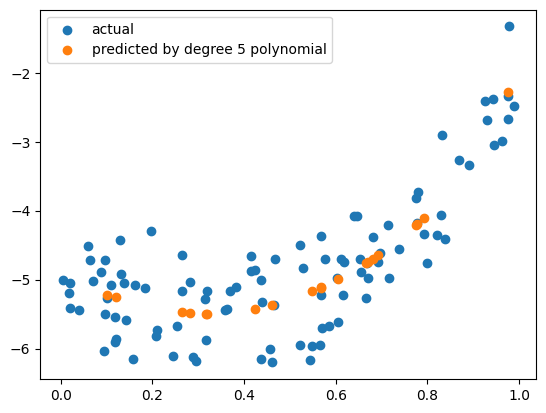

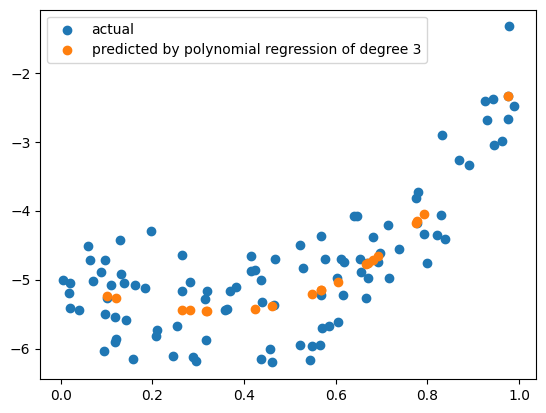

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(0)
# Define the true coefficients of the polynomial
true_coefficients = [4, 2, -3, -5]  # The coefficients of the polynomial are 4, 2, and -3 for x^2, x, and the intercept respectively
# Generate random x values
X = np.random.rand(100, 1)  # Generate 100 random values between 0 and 1
# Generate y values with polynomial relationship
y = true_coefficients[0] * X**3 + true_coefficients[1] * X**2 + true_coefficients[2]*X + true_coefficients[3]
# Add random noise to y
y += np.random.normal(scale=0.5, size=y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 5
X_train_new = np.column_stack([X_train**i for i in range(degree+1)])
X_test_new = np.column_stack([X_test**i for i in range(degree+1)])

x_transpose = np.transpose(X_train_new)
x_transpose_x = np.dot(x_transpose, X_train_new)
x_transpose_y = np.dot(x_transpose,y_train)
theta = np.dot(np.linalg.inv(x_transpose_x), x_transpose_y)
# print(theta_normal)

optimized_y_test = [np.dot(X_test_new[i], theta) for i in range(X_test_new.shape[0])]
plt.scatter(X,y, label= 'actual')
plt.scatter(X_test, optimized_y_test, label= 'predicted by degree 5 polynomial')
plt.legend()
plt.show()


# Define a range of candidate degrees
degrees = range(1, int(len(X_train)/2))

best_degree = None
best_mse = float('inf')
for degree in degrees:
    X_train_new = np.column_stack([X_train**i for i in range(degree+1)])
    X_test_new = np.column_stack([X_test**i for i in range(degree+1)])

    x_transpose = np.transpose(X_train_new)
    x_transpose_x = np.dot(x_transpose, X_train_new)
    x_transpose_y = np.dot(x_transpose,y_train)
    theta = np.dot(np.linalg.inv(x_transpose_x), x_transpose_y)
    # print(theta_normal)

    optimized_y_test_normal = [np.dot(X_test_new[i], theta) for i in range(X_test_new.shape[0])]
    mse = mean_squared_error(optimized_y_test_normal, y_test)

    if mse < best_mse:
        best_degree = degree
        best_mse = mse
        best_theta = theta

X_test_for_best = np.column_stack([X_test**i for i in range(best_degree+1)])
final_y_test_normal = [[np.dot(X_test_for_best[i], best_theta) for i in range(X_test_new.shape[0])]]
# print(f'shape of x_test: {X_test.shape} and shape of y_test: {y_test.shape}')
plt.scatter(X,y, label= 'actual')
plt.scatter(X_test, final_y_test_normal, label= f'predicted by polynomial regression of degree {best_degree}')
plt.legend()
plt.show()